In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os 
import pandas as pd
import urllib
import bs4
import re
import copy
import collections as co
import plotly
import plotly.graph_objects as go

In [26]:
#AS_N = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS_N.csv')

In [49]:
AS_N = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS_N.csv')

In [50]:
AS_N[['IMDB Rating']].isna().sum()

IMDB Rating    86
dtype: int64

In [28]:
AS_N.head()

,Unnamed: 0,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Top IMDB
0,0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5,Netflix,1
1,1,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3,Netflix,1
2,2,Dark,2017,16+,8.8,95,"Crime,Drama",A missing child causes four families to help e...,3,Netflix,1
3,3,Sherlock,2010,16+,9.1,94,"Action & Adventure,Crime",A modern update finds the famous sleuth and hi...,4,Netflix,1
4,4,Better Call Saul,2015,18+,8.7,92,"Comedy,Crime",Six years before Saul Goodman meets Walter Whi...,5,Netflix,1


In [29]:
AS_N.dtypes

Unnamed: 0              int64
Series Title           object
Year Released           int64
Content Rating         object
IMDB Rating           float64
R Rating                int64
Genre                  object
Description            object
No of Seasons           int64
Streaming Platform     object
Top IMDB                int64
dtype: object

In [30]:
AS_N[['No of Seasons']].isna().sum()
AS_N[['Top IMDB']].isna().sum()

Top IMDB    0
dtype: int64

In [31]:
#AS_N['R Rating'] = df_AS_N['R Rating'].div(10)

In [55]:
# Matrice de corrélation
#argument conditionnel score, 0 par défaut, si = 1 on drop aussi les NaN de la colonne Score
def plotCorrelationMatrix(df, graphWidth,score=0):
#    filename = df.dataframeName
    df = df.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating']) # drop rows with NaN
    if score ==1 : df = df.dropna(subset=['Score'])
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = sns.heatmap(df.corr(), annot = True)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


In [56]:
AS_N = AS_N.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating']) # drop rows with NaN
AS_N[['IMDB Rating']].isna().sum()

IMDB Rating    0
dtype: int64

ValueError: not enough values to unpack (expected 2, got 0)

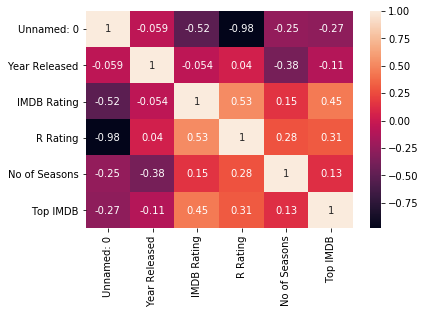

<Figure size 640x640 with 0 Axes>

In [58]:
plotCorrelationMatrix(AS_N, 8)
#Résultat étrange pour la corrélation entre la note imdb et la présence dans le top : 
#corrélation à 0.47 alors que la variable Top IMDB est codé à partir des résultats 

In [59]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize, score =0):
    
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating']) # drop rows with NaN
    if score ==1 : df = df.dropna(subset=['Score'])
        
    df = df.loc[(df!=0).any(axis=1)]
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

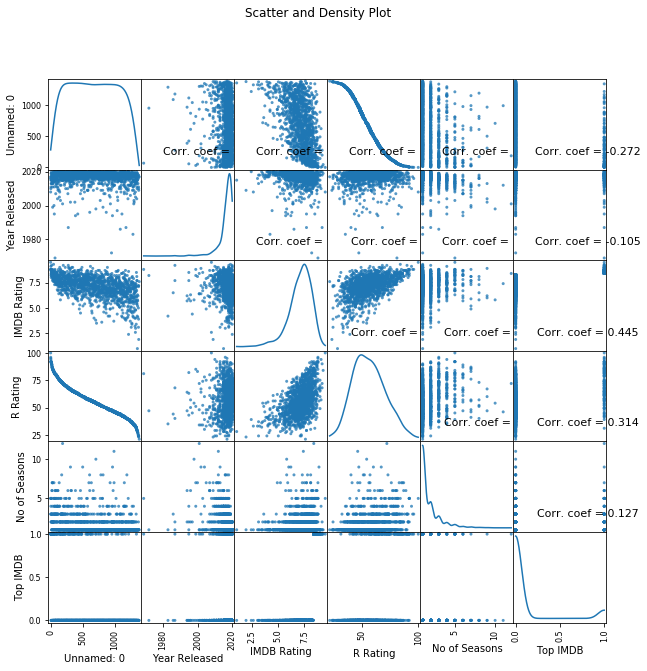

In [60]:
plotScatterMatrix (AS_N,10,11)

In [ ]:
AS_N_x_carac = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS_N_x_carac.csv')

In [61]:
AS_N_x_carac = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS_N_x_carac.csv')

In [62]:
AS_N_x_carac.tail()

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Top IMDB,Netflix Exclusive,Score
1422,Zumbo's Just Desserts,2016,7+,6.9,60,"Reality,2016",Australia’s very own Willy Wonka Adriano Zumbo...,2,0,NaN,NaN
1423,iZombie,2015,16+,7.9,82,"Drama,Science-Fiction",A medical student who becomes a zombie joins a...,5,0,NaN,NaN
1424,revisions,2019,18+,6.1,48,"Animation,Action & Adventure",An isolated city. An unknown enemy. An uncerta...,1,0,NaN,NaN
1425,天国的嫁衣,2004,NaN,5.6,30,"Drama,2004",It was with much difficulty that Ai-Ching (Cyn...,1,0,NaN,NaN
1426,阳关道,2018,NaN,3.2,33,"Comedy,Horror","To catch three criminal masterminds, a group o...",1,0,NaN,NaN


ValueError: not enough values to unpack (expected 2, got 0)

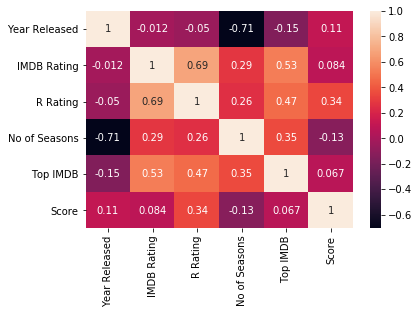

<Figure size 640x640 with 0 Axes>

In [63]:
plotCorrelationMatrix(AS_N_x_carac, 8, 1)
#comme il y a peu de séries qui ont un score, les corrélations sont calculées sur un échantillon plus faible
#d'où des changements dans les valeurs

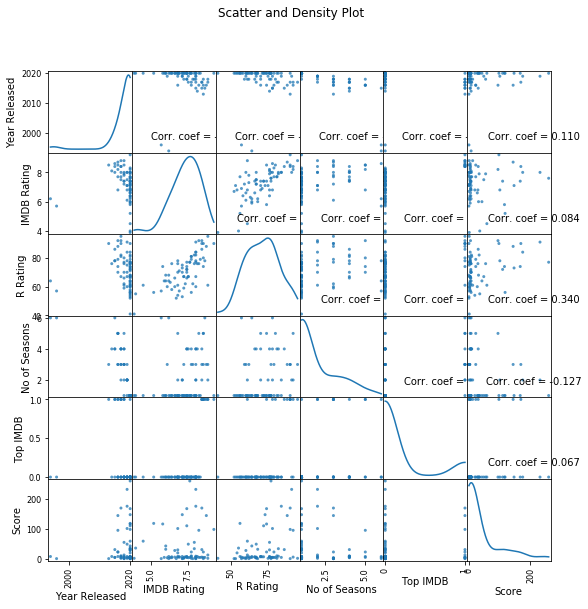

In [64]:
plotScatterMatrix (AS_N_x_carac,9,10,1)

# Représentation des profils de série

### (si on a le temps on fait des graphs ou on garde les tableaux ?)

In [ ]:
AS = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS.csv')
df_carac= pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\df_carac.csv')

In [65]:
AS = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS.csv')
df_carac= pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\df_carac.csv')

In [66]:
AS_x_carac = AS.set_index('Series Title').join(df_carac.set_index('Unnamed: 0'))

In [68]:
AS_Top = AS_x_carac[AS_x_carac["Top IMDB"] == 1]
AS_N_Top = AS_N_x_carac[AS_N_x_carac["Top IMDB"] == 1]

AS_N_score = AS_N_x_carac.dropna(subset=['Score'])

        
N_Originals = AS_N_x_carac[AS_N_x_carac["Netflix Exclusive"] == 'Yes']
N_Originals_Top = N_Originals[N_Originals["Top IMDB"] == 1]

On s'intéresse aux caractéristiques des séries du Top 250 IMDB

In [69]:
AS_Top.mean()
#AS_Top.max() Pas forcement très utile
#AS_Top.min()

Unnamed: 0       3145.383798
Year Released    2008.474104
IMDB Rating         8.635591
R Rating           62.994688
No of Seasons       4.290837
Top IMDB            1.000000
Score              29.950000
dtype: float64

On s'intéresse aux caractéristiques des séries présentes dans le top quotidien Netflix

In [70]:
AS_N_score.mean(axis=0)

Year Released    2018.095890
IMDB Rating         7.263014
R Rating           71.315068
No of Seasons       2.095890
Top IMDB            0.150685
Score              35.945205
dtype: float64

On s'intéresse aux caractéristiques des séries présentes sur Netflix qui entrent dans le Top 250 IMDB

In [71]:
AS_N_Top.mean()

Year Released    2015.090164
IMDB Rating         8.631967
R Rating           70.081967
No of Seasons       2.303279
Top IMDB            1.000000
Score              45.181818
dtype: float64

On s'intéresse aux caractéristiques des séries originales Netflix 

In [72]:
N_Originals.mean()

Year Released    2018.865672
IMDB Rating         7.238806
R Rating           70.895522
No of Seasons       1.985075
Top IMDB            0.134328
Score              36.388060
dtype: float64

On s'intéresse aux caractéristiques des séries originales Netflix qui entrent dans le Top 250 IMDB

In [73]:
N_Originals_Top.mean()

Year Released    2016.555556
IMDB Rating         8.566667
R Rating           82.666667
No of Seasons       3.666667
Top IMDB            1.000000
Score              44.222222
dtype: float64

In [ ]:
#AS_N_score.groupby(pd.qcut(AS_N_score.Score, 10))['Score'].sum()
#Si on veut "normaliser score on peut diviser la colonne par le 9ème décile"

In [ ]:
#boxplot = AS_N_score.boxplot(column=['IMDB Rating', 'R Rating', 'Score'])
#Pas même échelle donc pas très interéssant, on peut diviser par 10 pour rotten tomatoes 
#par contre c'est tendu pour le score, diviser par le 9ème décile à la limite

In [74]:
AS_N_x_carac[AS_N_x_carac['Unnamed: 0'].isin(['The Last Dance'])]

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Top IMDB,Netflix Exclusive,Score
1175,The Last Dance,2020,16+,9.2,90,"Documentary,Biography",A 10-part documentary chronicling the untold s...,1,1,No,98.0


In [75]:
AS_x_carac.head()

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Top IMDB,Type,Netflix Exclusive,Score
Mysteries of the Outdoors,12027,2017,NaN,NaN,-1,"2017,Travel Channel",Mysteries of the Outdoors has one or more epis...,2,Travel Channel,0,NaN,NaN,NaN
#BlackLove,8319,2015,16+,6.1,37,"Reality,Drama",#BlackLove follows five dynamic black women fr...,2,"Free Services,FYI",0,NaN,NaN,NaN
"#MeToo, Now What?",10046,2018,NaN,6.8,27,"Documentary,2018",Executive editor and host Zainab Salbi goes be...,1,"Free Services,Prime Video,Hoopla",0,NaN,NaN,NaN
#RichKids of Beverly Hills,8233,2014,16+,3.1,38,"Reality,2014",A look into the privileged lives of several tw...,4,fuboTV,0,NaN,NaN,NaN
#ThatsHarassment,10699,2018,NaN,NaN,18,"2018,Prime Video",#ThatsHarassment is a series of 6 short films ...,1,"Prime Video,Hulu,Starz",0,NaN,NaN,NaN
